**Dataset Link- https://universe.roboflow.com/iotseecs/brain-tumor-yzzav/dataset/1#**

In [2]:
!nvidia-smi

Wed Oct 29 09:47:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.1 MB/s eta 0:00:00


In [4]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.6/112.6 GB disk)


## **Download Dataset**

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nJBC3Kr2Z6qyZZJgYERo")
project = rf.workspace("iotseecs").project("brain-tumor-yzzav")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 62.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BRAIN-TUMOR-1 in yolov11:: 100%|██████████| 1680/1680 [00:00<00:00, 6478.79it/s]


## **Model Training**

In [2]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="/content/BRAIN-TUMOR-1/data.yaml", epochs=50, imgsz=640)

Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/BRAIN-TUMOR-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

## **Check validation**

In [4]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.pt")  # load an official model
model = YOLO("/content/runs/segment/train2/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps  # a list contains map50-95(B) of each category
metrics.seg.map  # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps  # a list contains map50-95(M) of each category

Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-seg summary (fused): 113 layers, 2,834,763 parameters, 0 gradients, 9.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2020.2±696.7 MB/s, size: 66.9 KB)
val: Scanning /content/BRAIN-TUMOR-1/valid/labels.cache... 123 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 123/123 259.5Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 1.5it/s 5.3s
                   all        123        126      0.987      0.976      0.994      0.795      0.987      0.976      0.994       0.79
Speed: 9.3ms preprocess, 8.0ms inference, 0.0ms loss, 8.3ms postprocess per image
Results saved to /content/runs/segment/val


array([    0.79009])

In [5]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.pt")  # load an official model
model = YOLO("/content/runs/segment/train2/weights/best.pt")  # load a custom model

# Predict with the model
results = model("/content/BRAIN-TUMOR-1/test/images")  # predict on an image

# Access the results
for result in results:
    xy = result.masks.xy  # mask in polygon format
    xyn = result.masks.xyn  # normalized
    masks = result.masks.data  # mask in matrix format (num_objects x H x W)


image 1/128 /content/BRAIN-TUMOR-1/test/images/y154_jpg.rf.bcc8bca03d5c754b1c3fecab26584b79.jpg: 640x640 1 tumor, 11.9ms
image 2/128 /content/BRAIN-TUMOR-1/test/images/y172_jpg.rf.1de5e52261087615739339dfec693873.jpg: 640x640 1 tumor, 10.5ms
image 3/128 /content/BRAIN-TUMOR-1/test/images/y17_jpg.rf.00e73d21eb12c3ad8e3cb3b5a87805b8.jpg: 640x640 1 tumor, 12.1ms
image 4/128 /content/BRAIN-TUMOR-1/test/images/y192_jpg.rf.d4ef756fbf9c0fd35dc411b61f8aa184.jpg: 640x640 1 tumor, 16.1ms
image 5/128 /content/BRAIN-TUMOR-1/test/images/y193_jpg.rf.898204dcdfcff60fff55f3734567e205.jpg: 640x640 1 tumor, 12.1ms
image 6/128 /content/BRAIN-TUMOR-1/test/images/y193_jpg.rf.d75ad28b5fae3f14d696dfc98ef3d326.jpg: 640x640 1 tumor, 10.1ms
image 7/128 /content/BRAIN-TUMOR-1/test/images/y196_jpg.rf.cb679791b2f16798391d0a24d51aca4c.jpg: 640x640 1 tumor, 9.9ms
image 8/128 /content/BRAIN-TUMOR-1/test/images/y197_jpg.rf.bf846157858d9835059250fd69f91316.jpg: 640x640 1 tumor, 9.9ms
image 9/128 /content/BRAIN-TUMOR-1

In [9]:
from IPython.display import Image

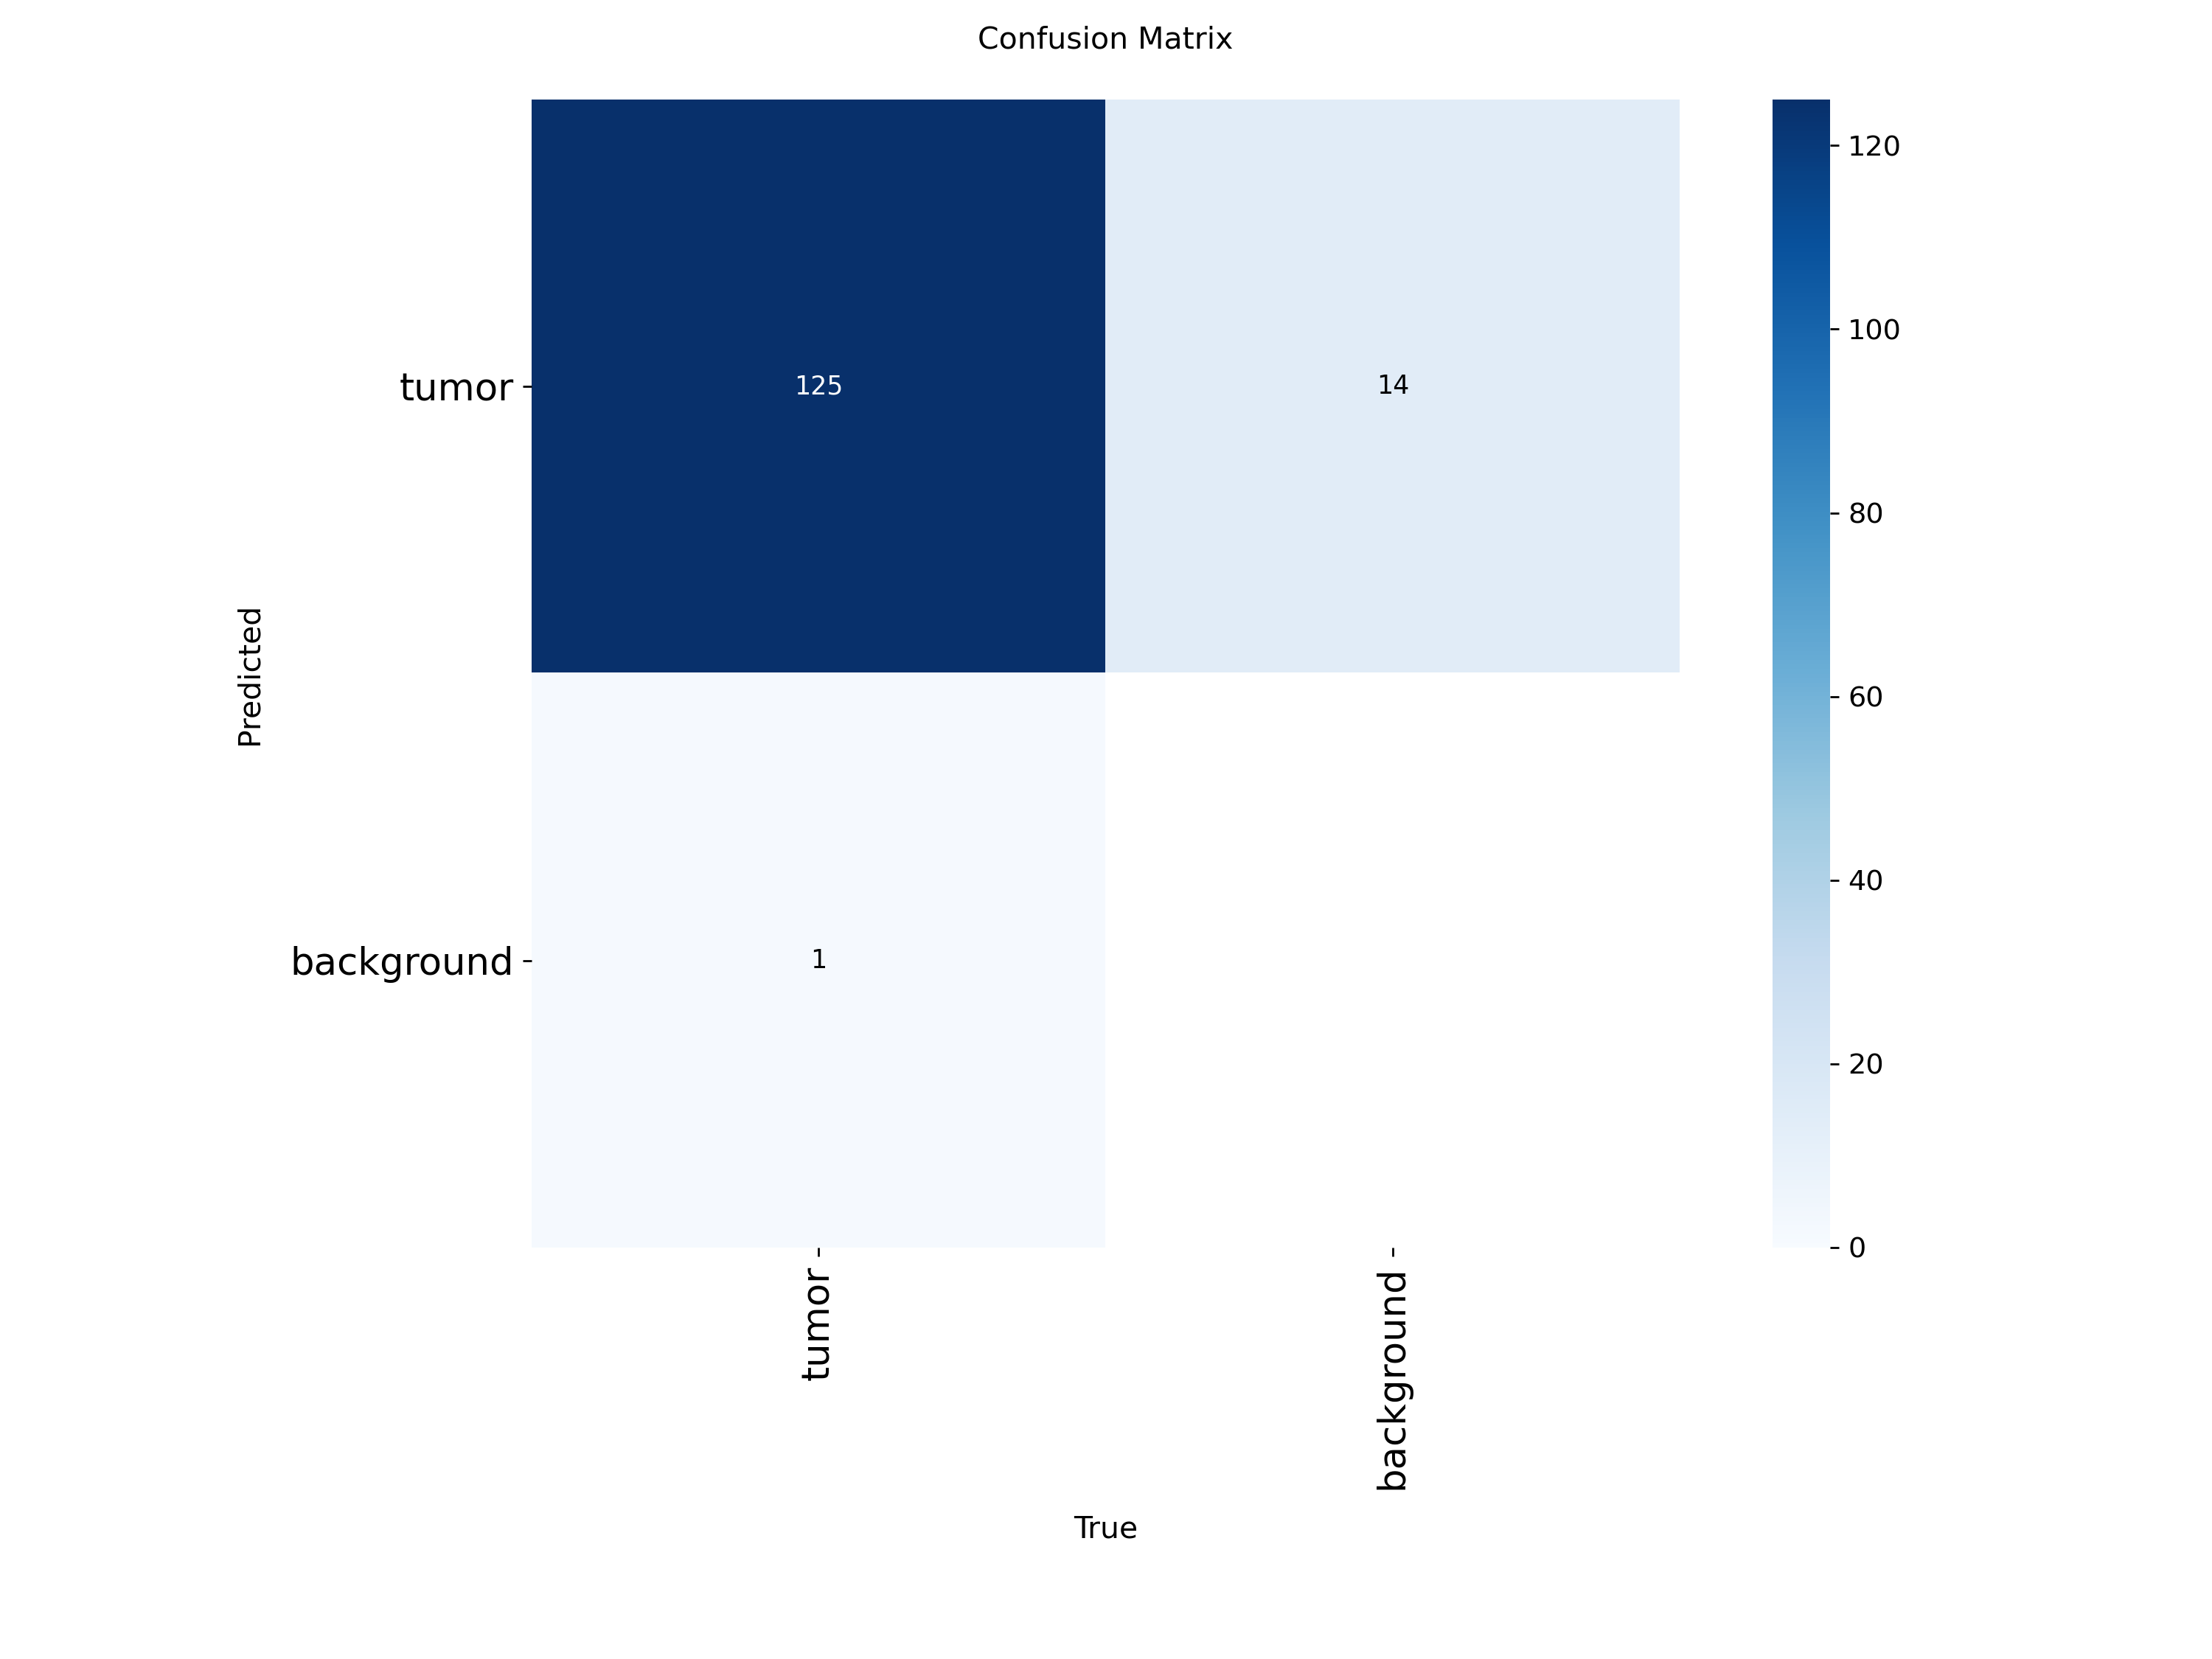

In [10]:
Image("/content/runs/segment/train2/confusion_matrix.png", width=500)

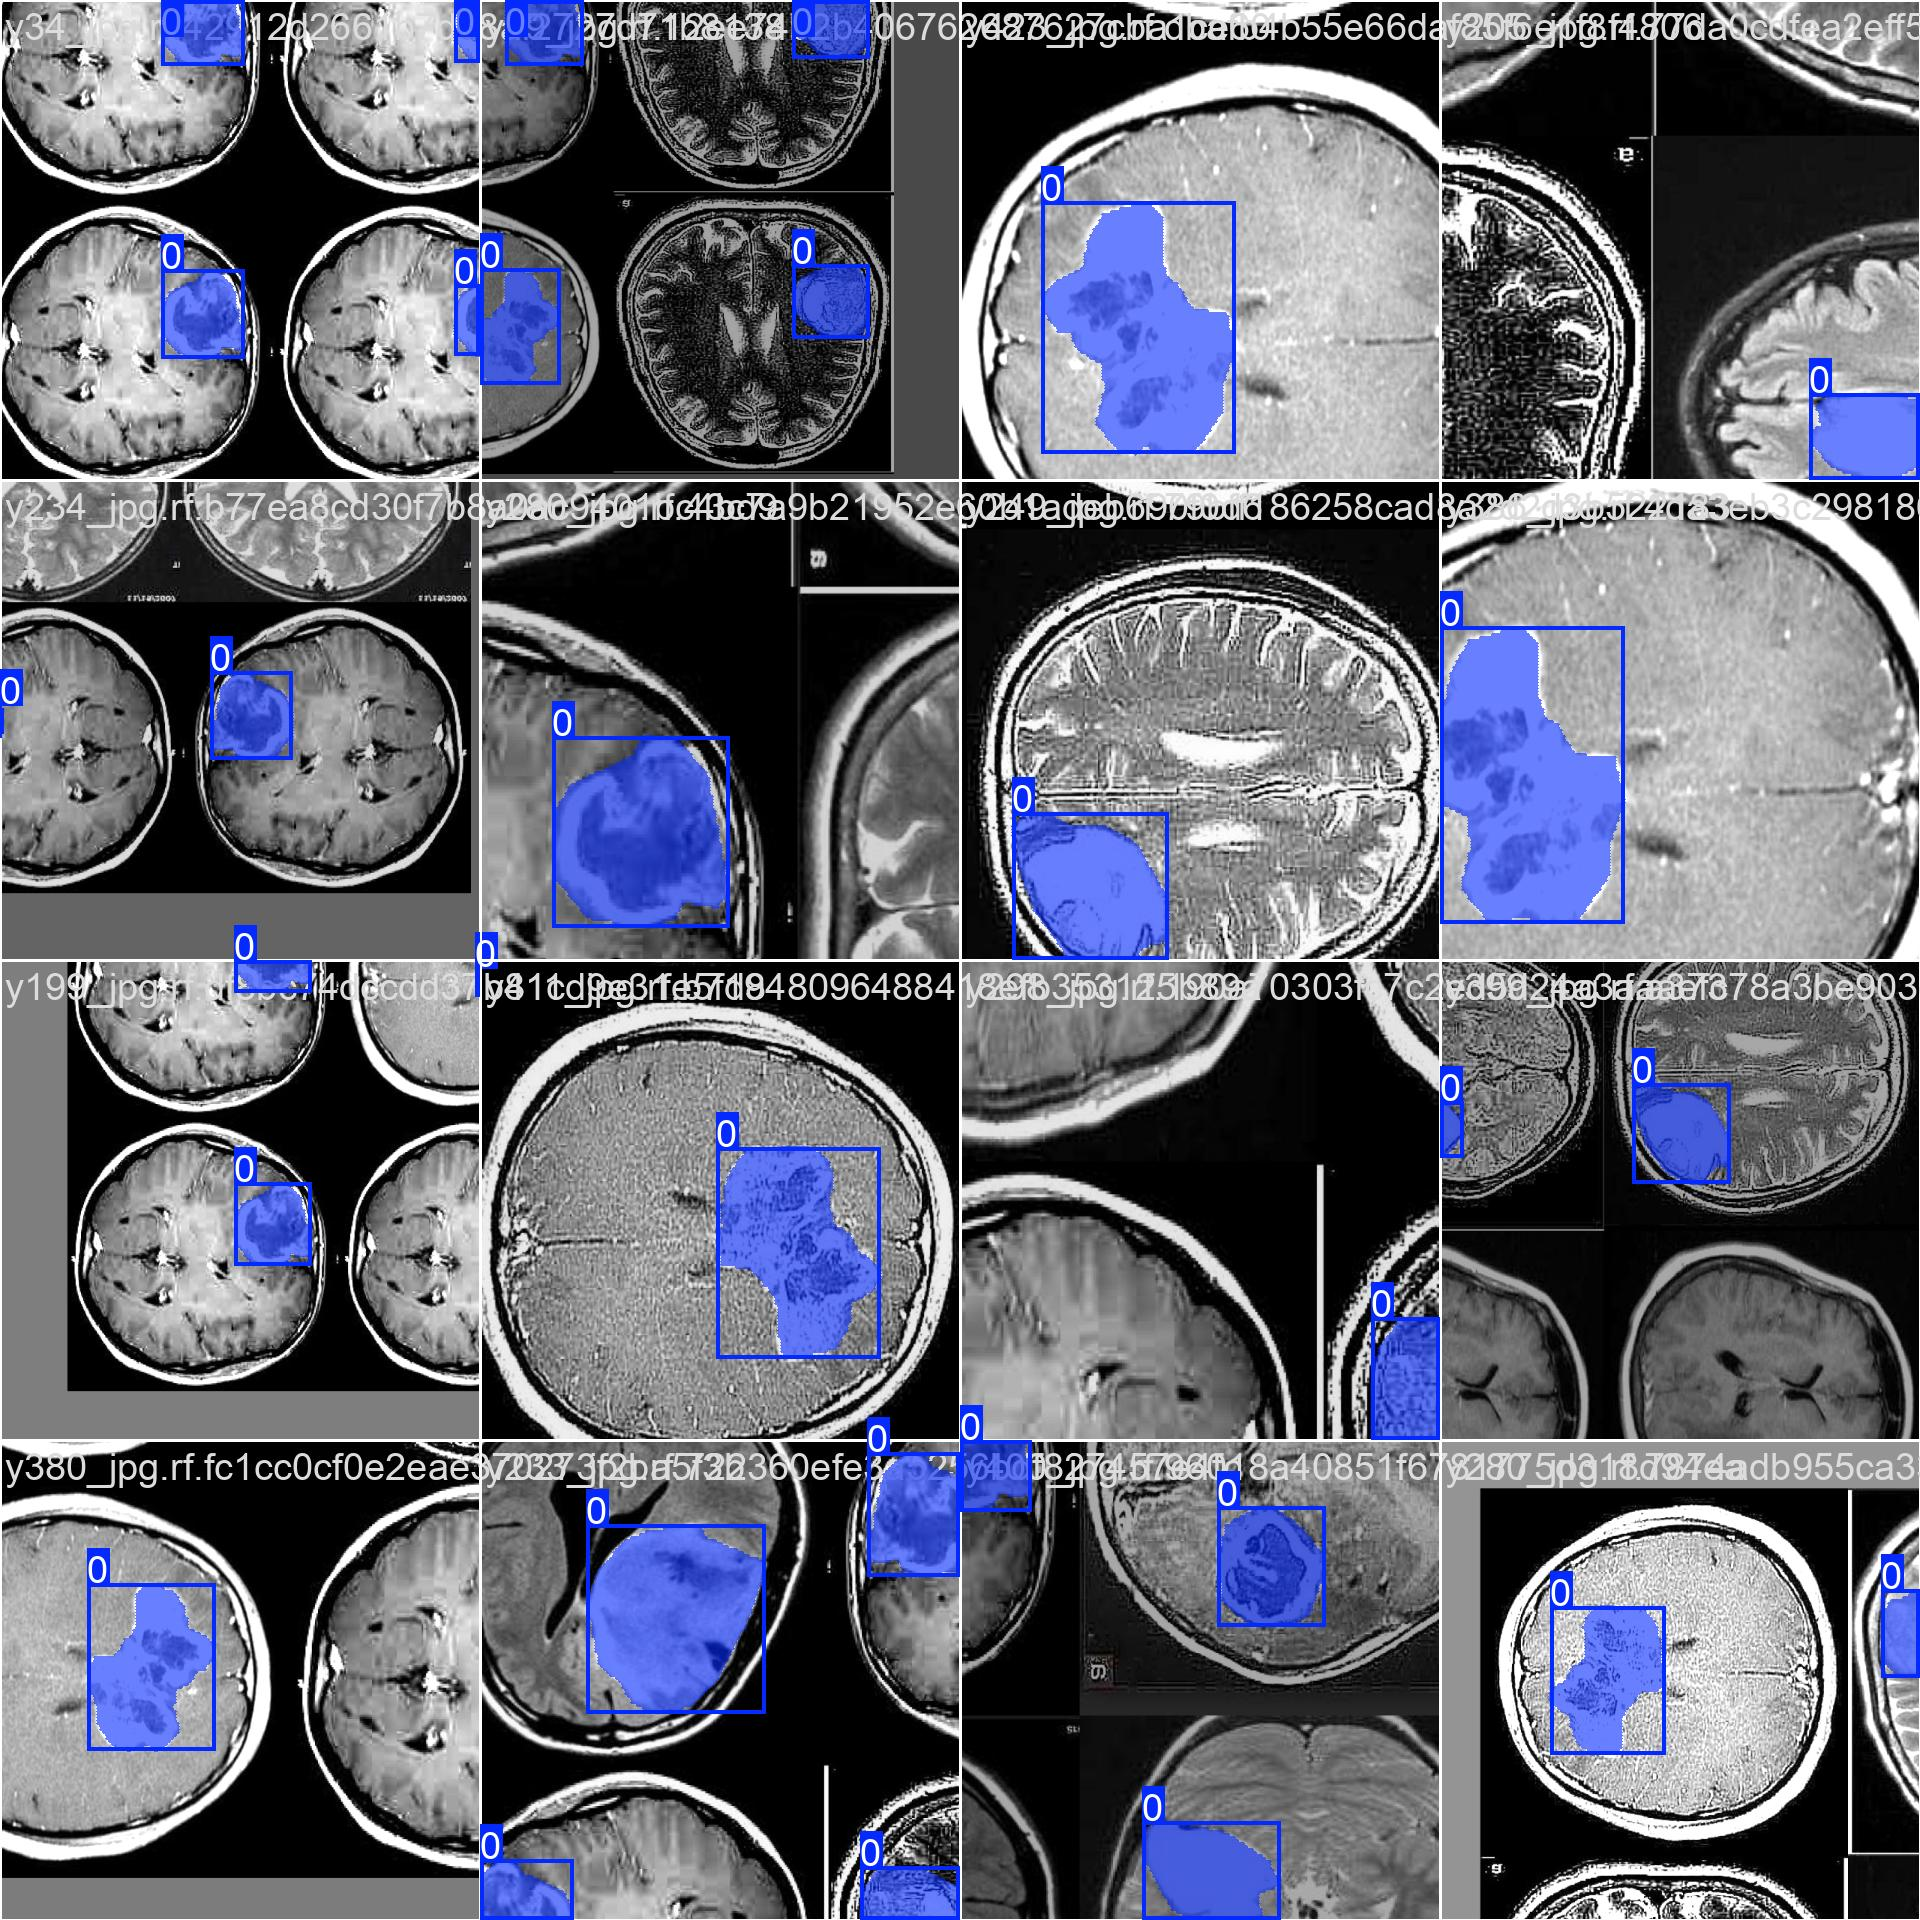

In [11]:
Image("/content/runs/segment/train2/train_batch0.jpg", width=500)

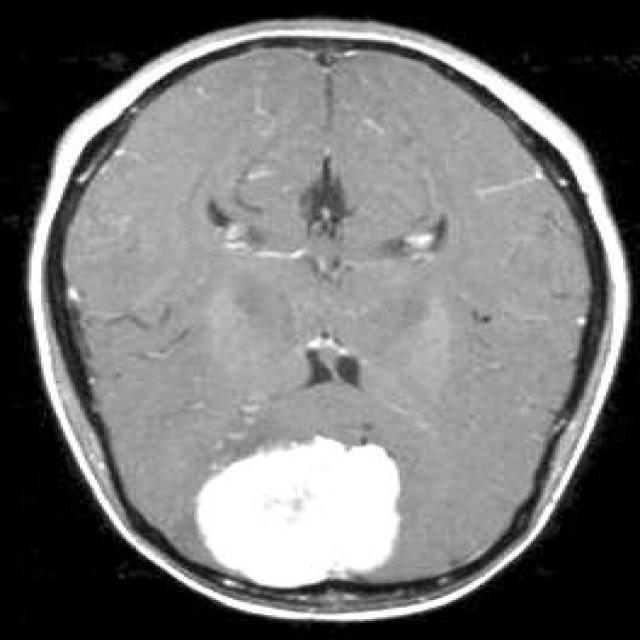

In [12]:
Image("/content/BRAIN-TUMOR-1/test/images/y154_jpg.rf.bcc8bca03d5c754b1c3fecab26584b79.jpg", width=600)

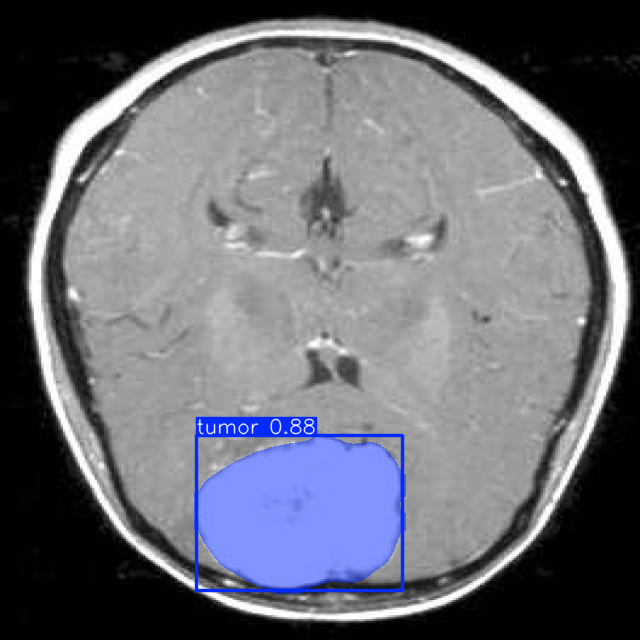

In [13]:
results[0].show()